In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

from fairdivision.algorithms.efx_envy_cycle_elimination import efx_envy_cycle_elimination
from fairdivision.algorithms.envy_cycle_elimination import envy_cycle_elimination
from fairdivision.algorithms.draft_and_eliminate import draft_and_eliminate
from fairdivision.algorithms.ordered_picking import ordered_picking
from fairdivision.algorithms.round_robin import round_robin
from fairdivision.experiments.measurements import *
from fairdivision.utils.allocation import Allocation
from fairdivision.utils.checkers import *
from fairdivision.utils.generators import *

In [3]:
def run_algorithm(n, m, generator, iterations, algorithm, property_name):
    seed = random.randint(1, 100_000_000)
    random.seed(seed)
    
    measurements = []
    
    for _ in range(iterations):
        agents = generate_agents(n)
        items = generate_items(m)
        
        generate_valuations(agents, items, generator)
        
        allocation = algorithm(agents, items)

        # if the algorithm is Round-Robin
        if isinstance(allocation, tuple):
            allocation = allocation[0]

        if property_name == "EF1":
            measurements.append((ef1_satisfied_factor(agents, allocation), highest_ef1_approximation(agents, allocation)))
        elif property_name == "EFX":
            measurements.append((efx_satisfied_factor(agents, allocation), highest_efx_approximation(agents, allocation)))
        elif property_name == "PROP":
            measurements.append((prop_satisfied_factor(agents, items, allocation), highest_prop_approximation(agents, items, allocation)))

    return measurements


def get_satisfied_number(measurements):
    return len(list(filter(lambda factor: factor == 1.0, map(lambda measurement: measurement[0], measurements))))
    

def print_property_satisfaction(measurements, property_name):
    not_satisfied = list(filter(lambda measurement: measurement[1] < 1.0, measurements))

    factors = dict()
    approximations = list()

    for factor, _ in not_satisfied:
        if factor in factors:
            factors[factor] += 1
        else:
            factors[factor] = 1

    print(f"    {len(measurements) - len(not_satisfied)} out of {len(measurements)} are {property_name}\n    factors:        [", end="")
    
    first = True
    for factor, occurrences in sorted(factors.items(), key=lambda pair: pair[0]):
        if not first:
            print(", ", end="")

        if occurrences == 1:
            print(f"{factor} - {occurrences} time", end="")
        else:
            print(f"{factor} - {occurrences} times", end="")

        first = False

    print("]\n    approximations: [", end="")

    first = True
    for _, approximation in sorted(filter(lambda measurement: measurement[1] < 1.0, measurements), reverse=True):
        if not first:
            print(", ", end="")

        print(f"{approximation}", end="")
        
        first = False

    print("]\n")


def draw(
        x: np.ndarray,
        y_per_labels: dict[str, np.ndarray],
        xlabel: str,
        ylabel: str,
        title: str) -> None:
    """
    Plots a mean value with corresponding standard deviation for each label on one figure.
    """

    plt.figure(figsize=(15, 6))

    plt.xlim(x[0], x[-1])
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    for (label, y) in y_per_labels.items():
        plt.plot(x, y, label=label)
        
    plt.legend()
    plt.title(title)

    plt.show()

### EFX

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 

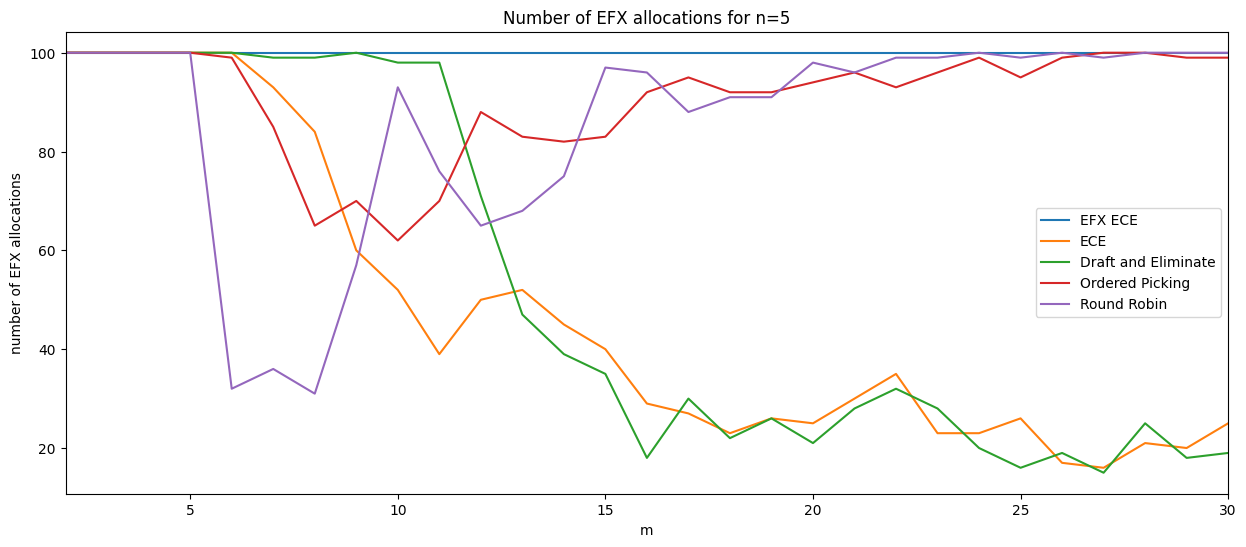

In [20]:
n = 5
ms = np.arange(2, 31, 1)

generator = AdditiveGenerator(min=0, max=100)
# generator = OrderedGenerator(min=0, max=10000)

iterations = 100

satisfied_per_label = dict()
satisfied_per_label["EFX ECE"] = []
satisfied_per_label["ECE"] = []
satisfied_per_label["Draft and Eliminate"] = []
satisfied_per_label["Ordered Picking"] = []
satisfied_per_label["Round Robin"] = []

for m in ms:
    print(m, end=" ")
    
    measurements = run_algorithm(n, m, generator, iterations, efx_envy_cycle_elimination, "EFX")
    satisfied_per_label["EFX ECE"].append(get_satisfied_number(measurements))

    measurements = run_algorithm(n, m, generator, iterations, envy_cycle_elimination, "EFX")
    satisfied_per_label["ECE"].append(get_satisfied_number(measurements))
    
    measurements = run_algorithm(n, m, generator, iterations, draft_and_eliminate, "EFX")
    satisfied_per_label["Draft and Eliminate"].append(get_satisfied_number(measurements))

    measurements = run_algorithm(n, m, generator, iterations, ordered_picking, "EFX")
    satisfied_per_label["Ordered Picking"].append(get_satisfied_number(measurements))
    
    measurements = run_algorithm(n, m, generator, iterations, round_robin, "EFX")
    satisfied_per_label["Round Robin"].append(get_satisfied_number(measurements))

satisfied_per_label["EFX ECE"] = np.array(satisfied_per_label["EFX ECE"])
satisfied_per_label["ECE"] = np.array(satisfied_per_label["ECE"])
satisfied_per_label["Draft and Eliminate"] = np.array(satisfied_per_label["Draft and Eliminate"])
satisfied_per_label["Ordered Picking"] = np.array(satisfied_per_label["Ordered Picking"])
satisfied_per_label["Round Robin"] = np.array(satisfied_per_label["Round Robin"])

draw(ms, satisfied_per_label, "m", "number of EFX allocations", "Number of EFX allocations for n=5")

In [ ]:
n = 5
ms = np.arange(2, 30, 2)

generator = AdditiveGenerator(min=0, max=100)
# generator = OrderedGenerator(min=0, max=10000)

iterations = 100

for m in ms:
    print(f"{n} agents and {m} items")
    print("  EFX ECE")
    measurements = run_algorithm(n, m, generator, iterations, efx_envy_cycle_elimination, "EFX")
    print_property_satisfaction(measurements, "EFX")

    print("  ECE")
    measurements = run_algorithm(n, m, generator, iterations, envy_cycle_elimination, "EFX")
    print_property_satisfaction(measurements, "EFX")

    print("  Draft and Eliminate")
    measurements = run_algorithm(n, m, generator, iterations, draft_and_eliminate, "EFX")
    print_property_satisfaction(measurements, "EFX")

    print("  Ordered Picking")
    measurements = run_algorithm(n, m, generator, iterations, ordered_picking, "EFX")
    print_property_satisfaction(measurements, "EFX")

    print("  Round Robin")
    measurements = run_algorithm(n, m, generator, iterations, round_robin, "EFX")
    print_property_satisfaction(measurements, "EFX")
    
    print()

### EF1

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 

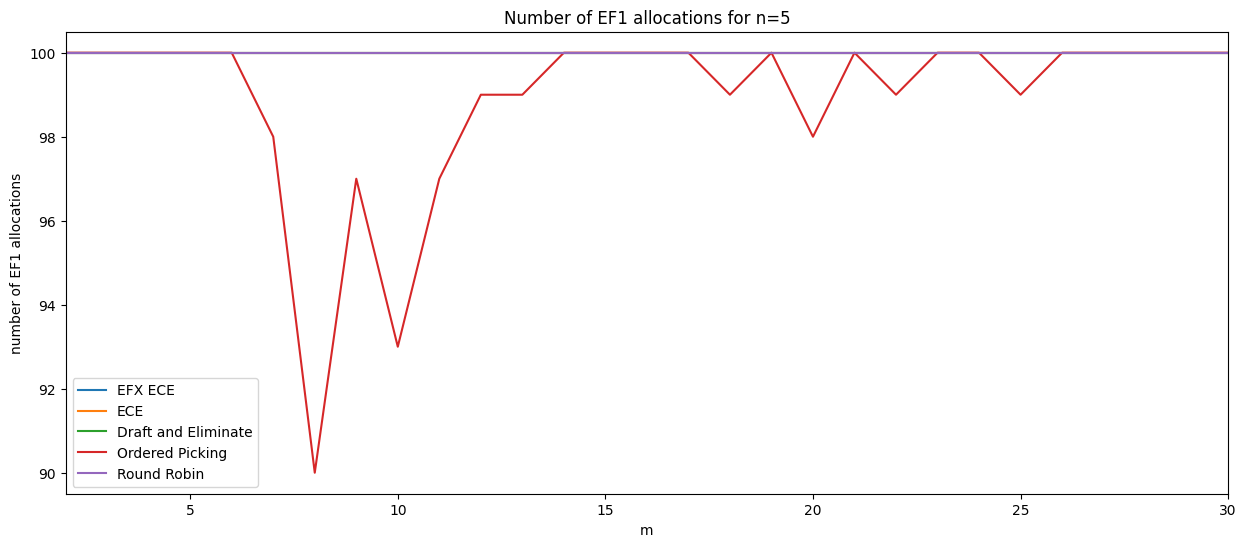

In [21]:
n = 5
ms = np.arange(2, 31, 1)

generator = AdditiveGenerator(min=0, max=100)
# generator = OrderedGenerator(min=0, max=10000)

iterations = 100

satisfied_per_label = dict()
satisfied_per_label["EFX ECE"] = []
satisfied_per_label["ECE"] = []
satisfied_per_label["Draft and Eliminate"] = []
satisfied_per_label["Ordered Picking"] = []
satisfied_per_label["Round Robin"] = []

for m in ms:
    print(m, end=" ")
    
    measurements = run_algorithm(n, m, generator, iterations, efx_envy_cycle_elimination, "EF1")
    satisfied_per_label["EFX ECE"].append(get_satisfied_number(measurements))

    measurements = run_algorithm(n, m, generator, iterations, envy_cycle_elimination, "EF1")
    satisfied_per_label["ECE"].append(get_satisfied_number(measurements))
    
    measurements = run_algorithm(n, m, generator, iterations, draft_and_eliminate, "EF1")
    satisfied_per_label["Draft and Eliminate"].append(get_satisfied_number(measurements))

    measurements = run_algorithm(n, m, generator, iterations, ordered_picking, "EF1")
    satisfied_per_label["Ordered Picking"].append(get_satisfied_number(measurements))
    
    measurements = run_algorithm(n, m, generator, iterations, round_robin, "EF1")
    satisfied_per_label["Round Robin"].append(get_satisfied_number(measurements))

satisfied_per_label["EFX ECE"] = np.array(satisfied_per_label["EFX ECE"])
satisfied_per_label["ECE"] = np.array(satisfied_per_label["ECE"])
satisfied_per_label["Draft and Eliminate"] = np.array(satisfied_per_label["Draft and Eliminate"])
satisfied_per_label["Ordered Picking"] = np.array(satisfied_per_label["Ordered Picking"])
satisfied_per_label["Round Robin"] = np.array(satisfied_per_label["Round Robin"])

draw(ms, satisfied_per_label, "m", "number of EF1 allocations", "Number of EF1 allocations for n=5")

### PROP

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 

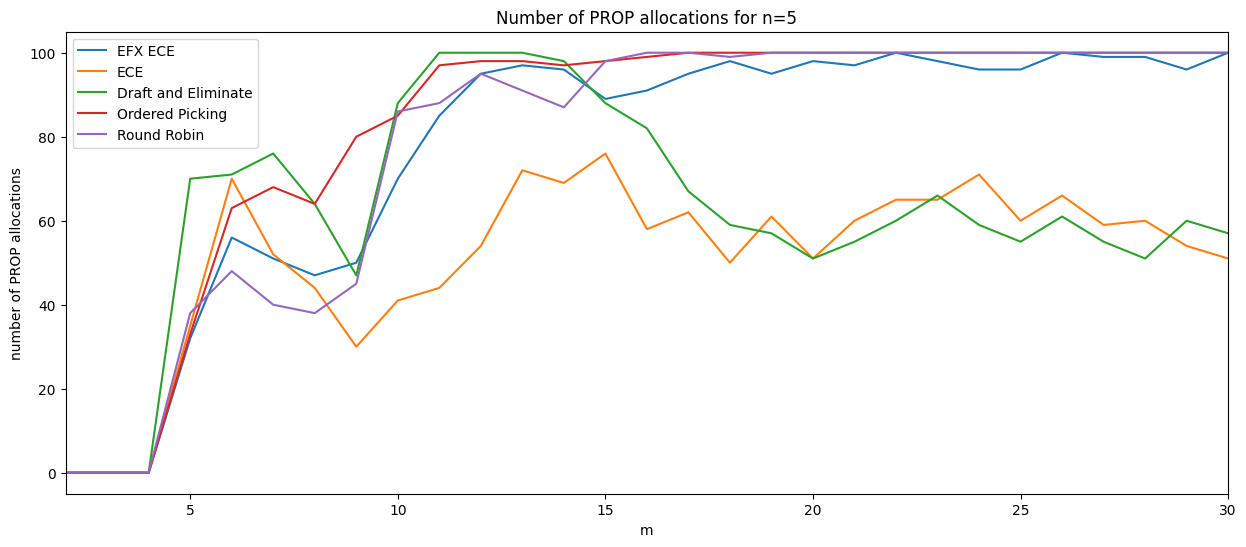

In [4]:
n = 5
ms = np.arange(2, 31, 1)

generator = AdditiveGenerator(min=0, max=100)
# generator = OrderedGenerator(min=0, max=10000)

iterations = 100

satisfied_per_label = dict()
satisfied_per_label["EFX ECE"] = []
satisfied_per_label["ECE"] = []
satisfied_per_label["Draft and Eliminate"] = []
satisfied_per_label["Ordered Picking"] = []
satisfied_per_label["Round Robin"] = []

for m in ms:
    print(m, end=" ")
    
    measurements = run_algorithm(n, m, generator, iterations, efx_envy_cycle_elimination, "PROP")
    satisfied_per_label["EFX ECE"].append(get_satisfied_number(measurements))

    measurements = run_algorithm(n, m, generator, iterations, envy_cycle_elimination, "PROP")
    satisfied_per_label["ECE"].append(get_satisfied_number(measurements))
    
    measurements = run_algorithm(n, m, generator, iterations, draft_and_eliminate, "PROP")
    satisfied_per_label["Draft and Eliminate"].append(get_satisfied_number(measurements))

    measurements = run_algorithm(n, m, generator, iterations, ordered_picking, "PROP")
    satisfied_per_label["Ordered Picking"].append(get_satisfied_number(measurements))
    
    measurements = run_algorithm(n, m, generator, iterations, round_robin, "PROP")
    satisfied_per_label["Round Robin"].append(get_satisfied_number(measurements))

satisfied_per_label["EFX ECE"] = np.array(satisfied_per_label["EFX ECE"])
satisfied_per_label["ECE"] = np.array(satisfied_per_label["ECE"])
satisfied_per_label["Draft and Eliminate"] = np.array(satisfied_per_label["Draft and Eliminate"])
satisfied_per_label["Ordered Picking"] = np.array(satisfied_per_label["Ordered Picking"])
satisfied_per_label["Round Robin"] = np.array(satisfied_per_label["Round Robin"])

draw(ms, satisfied_per_label, "m", "number of PROP allocations", "Number of PROP allocations for n=5")

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 

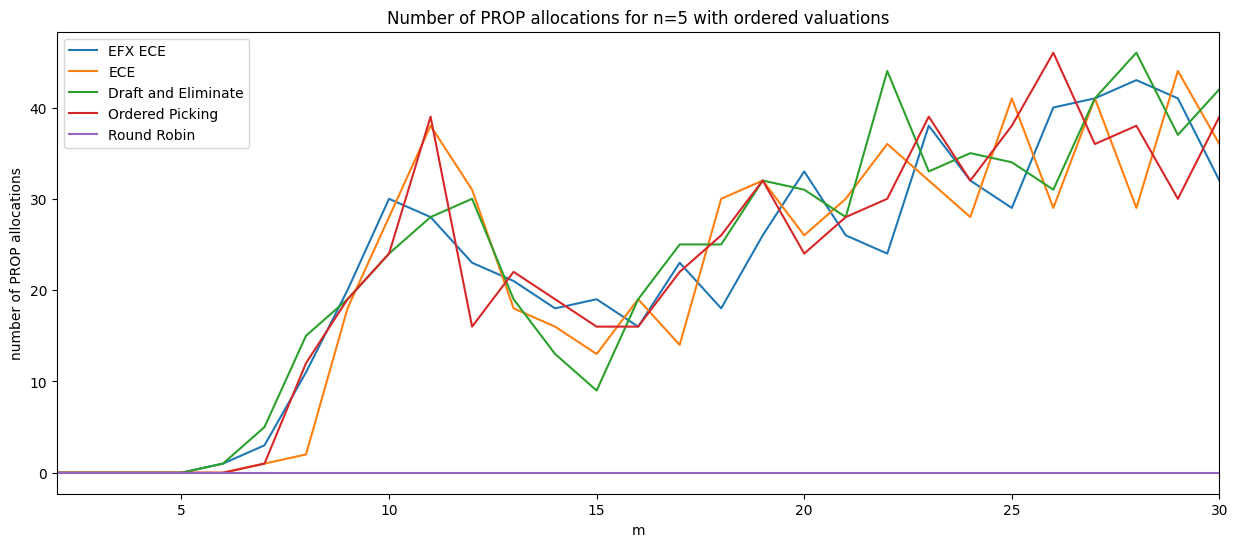

In [5]:
n = 5
ms = np.arange(2, 31, 1)

# generator = AdditiveGenerator(min=0, max=100)
generator = OrderedGenerator(min=0, max=10000)

iterations = 100

satisfied_per_label = dict()
satisfied_per_label["EFX ECE"] = []
satisfied_per_label["ECE"] = []
satisfied_per_label["Draft and Eliminate"] = []
satisfied_per_label["Ordered Picking"] = []
satisfied_per_label["Round Robin"] = []

for m in ms:
    print(m, end=" ")
    
    measurements = run_algorithm(n, m, generator, iterations, efx_envy_cycle_elimination, "PROP")
    satisfied_per_label["EFX ECE"].append(get_satisfied_number(measurements))

    measurements = run_algorithm(n, m, generator, iterations, envy_cycle_elimination, "PROP")
    satisfied_per_label["ECE"].append(get_satisfied_number(measurements))
    
    measurements = run_algorithm(n, m, generator, iterations, draft_and_eliminate, "PROP")
    satisfied_per_label["Draft and Eliminate"].append(get_satisfied_number(measurements))

    measurements = run_algorithm(n, m, generator, iterations, ordered_picking, "PROP")
    satisfied_per_label["Ordered Picking"].append(get_satisfied_number(measurements))
    
    measurements = run_algorithm(n, m, generator, iterations, round_robin, "PROP")
    satisfied_per_label["Round Robin"].append(get_satisfied_number(measurements))

satisfied_per_label["EFX ECE"] = np.array(satisfied_per_label["EFX ECE"])
satisfied_per_label["ECE"] = np.array(satisfied_per_label["ECE"])
satisfied_per_label["Draft and Eliminate"] = np.array(satisfied_per_label["Draft and Eliminate"])
satisfied_per_label["Ordered Picking"] = np.array(satisfied_per_label["Ordered Picking"])
satisfied_per_label["Round Robin"] = np.array(satisfied_per_label["Round Robin"])

draw(ms, satisfied_per_label, "m", "number of PROP allocations", "Number of PROP allocations for n=5 with ordered valuations")